# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator



train_dir= r"C:\Users\shash\Downloads\Project - CNN for Image Classification\Project - CNN for Image Classification\dataset\training_set"

train_data = ImageDataGenerator(
    rescale=1./255,                # Normalize pixel values to [0, 1]
    shear_range=0.2,              # Random shear
    zoom_range=0.2,               # Random zoom
    horizontal_flip=True,         # Random horizontal flip
    rotation_range=20              # Random rotation
)


train_ds=train_data.flow_from_directory(
    train_dir,
    target_size=(150, 150),      
    batch_size=32,
    class_mode='binary'
)



Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [17]:
test_dir=r"C:\Users\shash\Downloads\Project - CNN for Image Classification\Project - CNN for Image Classification\dataset\test_set"

test_data = ImageDataGenerator(rescale=1./255)

test_ds = test_data.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [18]:
model = models.Sequential()


### Step 1 - Convolution

In [20]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))

### Step 2 - Pooling

In [22]:
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

### Adding a second convolutional layer

In [23]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

### Step 3 - Flattening

In [24]:
model.add(layers.Flatten())

### Step 4 - Full Connection

In [25]:
model.add(layers.Dense(512, activation='relu'))

### Step 5 - Output Layer

In [26]:
model.add(layers.Dense(1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [32]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5148 - loss: 0.9459

C:\Users\shash\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 510s 2s/step - accuracy: 0.5148 - loss: 0.9451 - val_accuracy: 0.5085 - val_loss: 0.6915
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 350s 1s/step - accuracy: 0.5439 - loss: 0.6897 - val_accuracy: 0.6095 - val_loss: 0.6610
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 354s 1s/step - accuracy: 0.6063 - loss: 0.6538 - val_accuracy: 0.6805 - val_loss: 0.5875
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 293s 1s/step - accuracy: 0.6889 - loss: 0.5852 - val_accuracy: 0.7270 - val_loss: 0.5360
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 350s 1s/step - accuracy: 0.7279 - loss: 0.5385 - val_accuracy: 0.7535 - val_loss: 0.5054
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 358s 1s/step - accuracy: 0.7524 - loss: 0.4919 - val_accuracy: 0.7465 - val_loss: 0.5118
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 357s 1s/step - accuracy: 0.7823 - loss: 0.4676 - val_accuracy: 0.7870 - val_loss: 0.4507
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 322s 1s/step - accuracy: 0.7869 - loss: 0.4546 - val_accuracy: 0.794

AttributeError: 'History' object has no attribute 'summary'

## Part 4 - Making a single prediction

In [69]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
single_predictor=r"C:\Users\shash\Downloads\Project - CNN for Image Classification\Project - CNN for Image Classification\dataset\single_prediction"
files = os.listdir(single_predictor)
print("Files in the directory:", files)
results = []
def predict_image(img_path):
        img = image.load_img(img_path, target_size=(150, 150))  # Resize to model input size
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0  # Rescale to [0, 1]
        
        prediction = model.predict(img_array)
        return 'dog' if prediction[0][0] > 0.5 else 'cat', img_array


Files in the directory: ['cat_or_dog_1.jpg', 'cat_or_dog_2.jpg']


In [70]:
for img_name in os.listdir(single_predictor):
        img_path = os.path.join(single_predictor, img_name)  # Full path to the image
        predicted_label, img_array = predict_image(img_path)  # Call the prediction function
        
        
        results.append({
            'filename': img_name,
            'predicted_label': predicted_label,
            'img_array': img_array
        })

results_df = pd.DataFrame(results)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


In [71]:
print(results_df)

           filename predicted_label  \
0  cat_or_dog_1.jpg             dog   
1  cat_or_dog_2.jpg             cat   

                                           img_array  
0  [[[[0.21176471 0.22745098 0.02745098], [0.2235...  
1  [[[[0.9372549 0.9372549 0.9372549], [0.9372549...  


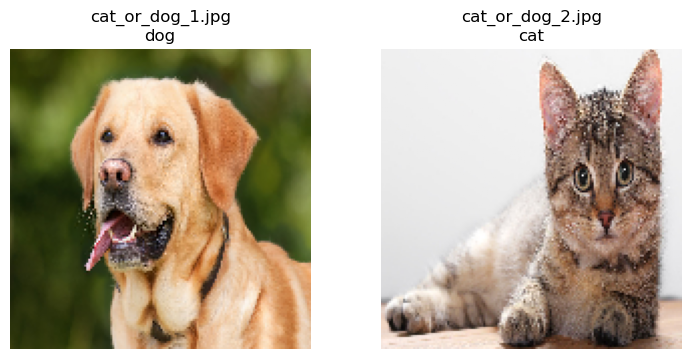

In [73]:
plt.figure(figsize=(15, 10))
for i, row in results_df.iterrows():
        img = row['img_array'][0]  # Extract the image array (first element since it's a batch)
        plt.subplot(3, 4, i + 1)  # Adjust the grid size as needed
        plt.imshow(img)  # Display the image
        plt.title(f"{row['filename']}\n{row['predicted_label']}")  # Show filename and predicted label
        plt.axis('off')  # Hide axes
plt.tight_layout()
plt.show()